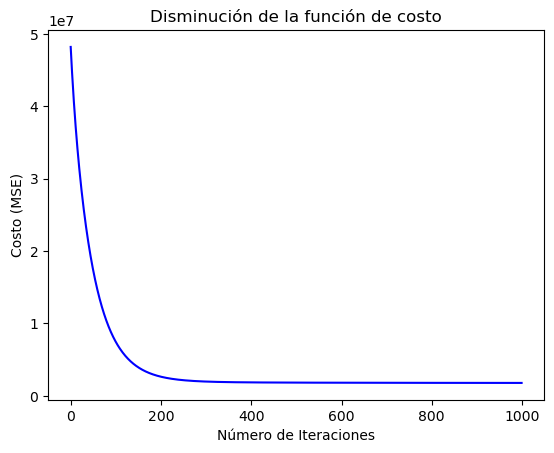

Error medio absoluto: 3.208801562258366


In [19]:
# Importar las librerías necesarias
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Descargar el dataset desde OpenML
boston = fetch_openml(data_id=531, as_frame=True)
X = pd.DataFrame(boston.data, columns=boston.feature_names)
y = pd.Series(boston.target, name='PRICE')

# Normalizar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Función para calcular el costo
def compute_cost(X, y, theta):
    m = len(y)
    predictions = X.dot(theta)
    cost = (1/2*m) * np.sum(np.square(predictions - y))
    return cost

# Función de gradiente descendente
def gradient_descent(X, y, theta, learning_rate, iterations):
    m = len(y)
    cost_history = np.zeros(iterations)
    
    for i in range(iterations):
        gradients = X.T.dot(X.dot(theta) - y) / m
        theta = theta - learning_rate * gradients
        cost_history[i] = compute_cost(X, y, theta)
        
    return theta, cost_history

# Inicialización de parámetros
m = X_train.shape[0]
X_b = np.c_[np.ones((m, 1)), X_train]  # Agregar una columna de 1s para el intercepto
theta = np.zeros(X_b.shape[1])
iterations = 1000
learning_rate = 0.01

# Ejecutar el algoritmo de gradiente descendente
theta_opt, cost_history = gradient_descent(X_b, y_train, theta, learning_rate, iterations)

# Graficar la función de costo a lo largo de las iteraciones
plt.plot(range(iterations), cost_history, 'b')
plt.title("Disminución de la función de costo")
plt.xlabel("Número de Iteraciones")
plt.ylabel("Costo (MSE)")
plt.show()

# Evaluar el modelo
m_test = X_test.shape[0]
X_b_test = np.c_[np.ones((m_test, 1)), X_test]  # Agregar columna de 1s para el intercepto
predictions = X_b_test.dot(theta_opt)

# Calcular el error medio absoluto (MAE)
mae = np.mean(np.abs(predictions - y_test))
print(f"Error medio absoluto: {mae}")


